<a href="https://colab.research.google.com/github/Ananassio/Data-Minig-Lab/blob/main/Week_8/Assignemnt_autoencoder-outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find Outliers in MNIST
Build an MLP auto encoder and find the outliers based on the MSE reconstruction error.

## Imports and data

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error

In [3]:
#get data without labels
(train_data, _), (test_data, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(60000, 28, 28)

## Task I: build MLP AE
* give latenspace size as hyper-parameter
* use MSE reconstruction loss

In [65]:
# This is the size of our encoded representations
encoding_dim = 14 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# This is our input image
input_img = tf.keras.Input(shape=(28,))
# "encoded" is the encoded representation of the input
l1 = layers.Dense(24, activation='relu')(input_img)
l2 = layers.Dense(18, activation='relu')(l1)
encoded = layers.Dense(15, activation='relu')(l2)

# "decoded" is the lossy reconstruction of the input

l4 = layers.Dense(18, activation='relu')(encoded)
l5 = layers.Dense(24, activation='relu')(l4)
decoded = layers.Dense(28, activation='relu')(l5)

# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = tf.keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = tf.keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
#decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))

In [66]:
# Compile the model
autoencoder.compile(optimizer='RMSprop', loss='mse')

In [67]:
autoencoder.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_59 (Dense)            (None, 24)                696       
                                                                 
 dense_60 (Dense)            (None, 18)                450       
                                                                 
 dense_61 (Dense)            (None, 15)                285       
                                                                 
 dense_62 (Dense)            (None, 18)                288       
                                                                 
 dense_63 (Dense)            (None, 24)                456       
                                                                 
 dense_64 (Dense)            (None, 28)                700

In [68]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_split=0.1,
    )

Epoch 1/50


420/422 [============================>.] - ETA: 0s - loss: 2214.2380

422/422 [==============================] - 4s 8ms/step - loss: 2211.0637 - val_loss: 1479.9908
Epoch 2/50
422/422 [==============================] - 3s 7ms/step - loss: 1396.3717 - val_loss: 1334.0690
Epoch 3/50
422/422 [==============================] - 3s 7ms/step - loss: 1318.4713 - val_loss: 1288.6454
Epoch 4/50
422/422 [==============================] - 3s 7ms/step - loss: 1273.3944 - val_loss: 1245.4768
Epoch 5/50
422/422 [==============================] - 3s 7ms/step - loss: 1238.6115 - val_loss: 1209.5588
Epoch 6/50
422/422 [==============================] - 3s 7ms/step - loss: 1215.8311 - val_loss: 1231.8121
Epoch 7/50
422/422 [==============================] - 3s 7ms/step - loss: 1201.2284 - val_loss: 1198.7253
Epoch 8/50
422/422 [==============================] - 3s 7ms/step - loss: 1190.3541 - val_loss: 1180.2092
Epoch 9/50
422/422 [==============================] - 3s 7ms/step - loss: 1181.4539 - val_loss: 1181.6543
Epoch 10/50
422/422 [==============================] - 3s

## Task II: compute reconstrucion loss 
* of all train images
* plot loss distribution
* find threshold for outliers

In [69]:
pred = autoencoder.predict(train_data)

1875/1875 [==============================] - 3s 2ms/step


In [70]:
mse = tf.keras.losses.MeanSquaredError()
mse(train_data, pred).numpy()

1103.4447

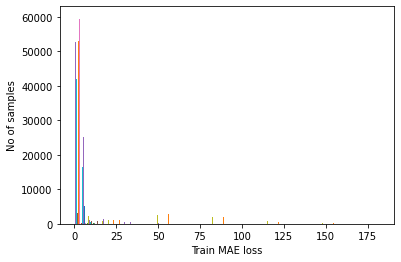

Reconstruction error threshold:  182.14285


In [71]:
train_mae_loss = np.mean(np.abs(pred - train_data), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)


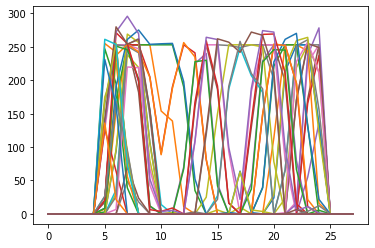

In [72]:
# Checking how the first sequence is learnt
plt.plot(train_data[0])
plt.plot(pred[0])
plt.show()


## Task III: visualize top 20 outliers


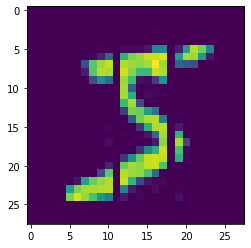

In [73]:
plt.imshow(pred[0])

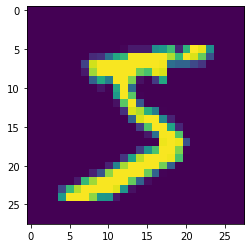

In [74]:
plt.imshow(train_data[0])